In [10]:
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv('/users/siddharthsmac/downloads/data 2.csv',',',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [12]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [13]:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [14]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [15]:
data.dropna(inplace = True)

In [16]:
passwords_tuple=np.array(data)

In [17]:
import random
random.shuffle(passwords_tuple)

In [18]:
y=[labels[1] for labels in passwords_tuple]

In [22]:
X=[labels[0] for labels in passwords_tuple]

In [24]:
import seaborn as sns

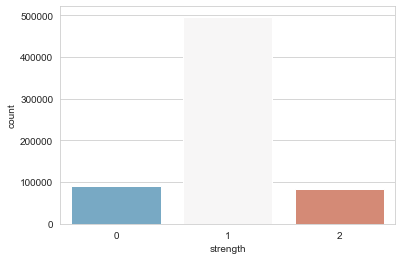

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='strength',data=data,palette='RdBu_r')

In [26]:
data.shape

(669639, 2)

In [27]:
def word_divide_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)
X=vectorizer.fit_transform(X)

In [29]:
X.shape

(669639, 130)

In [30]:
feature_names = vectorizer.get_feature_names()
 
first_document_vector=X[0]

df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
7,0.591732
5,0.566638
z,0.336271
k,0.291998
d,0.285454
...,...
>,0.000000
=,0.000000
<,0.000000
;,0.000000


## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
log_class=LogisticRegression(penalty='l2',multi_class='ovr') # becoz logistic regression is generally used for binary classifier
log_class.fit(X_train,y_train)

/Users/siddharthsmac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/siddharthsmac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
print(log_class.score(X_test,y_test))

0.8140493399438504


In [51]:
X_predict=np.array(['sid123'])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

[1]


In [37]:
## different parameters for logistic regression(Multinomial)
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
clf.fit(X_train, y_train) #training
print(clf.score(X_test, y_test))

0.8203885669912192


## XGboost

In [52]:
import xgboost as xgb

In [53]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
print(xgb_classifier.score(X_test,y_test))

0.9857311391195269


In [56]:
X_predict=np.array(['$sid123$'])
X_predict=vectorizer.transform(X_predict)
y_pred=xgb_classifier.predict(X_predict)
print(y_pred)

[1]


### Hyperparameter tuning

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [72]:
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [73]:
regressor=xgb.XGBRegressor()

In [74]:
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [75]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total= 8.8min
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.8min remaining:    0.0s


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total= 8.9min
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total= 9.4min
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total= 9.0min
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total= 8.6min
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=15.2min
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 


KeyboardInterrupt: 

In [ ]:
xg_random.best_params_

In [ ]:
xg_random.best_score_

In [ ]:
print(xg_random.score(X_test,y_test))

## Naive Bayes

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [59]:
print(nb_classifier.score(X_test,y_test))

0.7437130398423033


In [63]:
X_predict=np.array(['$$sid123$$'])
X_predict=vectorizer.transform(X_predict)
y_pred=nb_classifier.predict(X_predict)
print(y_pred)

[2]
